### 이미지 블렌딩 게임 제작
1. 데이터 수집(20~30장)
2. crawlingDB 폴더에 접근해서 이미지 확인
3. 이미지 읽기 출력 + 이미지 처리
4. 이미지 이름 영한사전 구축
5. 이미지에 맞는 한국어 단어 출력 알고리즘
6. image 블렌딩 : addWeighted() 2~3장
7. 정답을 입력받아 맞는지 체크하는 알고리즘 작성

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os # 운영체제 - 파일 관리 시스템
from PIL import Image

### Directory 접근하기
- os 모듈(라이브러리) 이용

In [7]:
# os.listdir(경로) : 해당 경로 안에 있는 파일 이름을 출력하는 기능
img_fd = os.listdir('./crawlingDB/')
img_fd

['apple.jpg',
 'cat.jfif',
 'cherry.jpg',
 'doraemon.jfif',
 'grape.jpg',
 'hamburger.jfif',
 'icecream.jfif',
 'jenny.jfif',
 'mango.jpg',
 'mc.jfif',
 'melon.jfif',
 'orange.jpg',
 'pm.jpg',
 'poodle.png',
 'rabbit.jfif',
 'rose.jfif',
 'ryan.jfif',
 'tiger.jfif',
 'tomato.jpg',
 'tteokbokki.jpg',
 'tulip.jfif',
 'watermelon.jpg',
 'zebra.jfif']

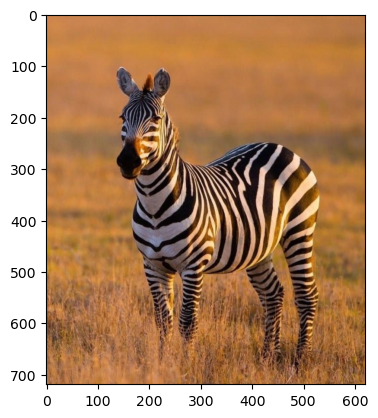

In [17]:
# 특정 이미지 불러와서 출력
# img = cv2.imread('./crawlingDB/zebra.jfif')
img = cv2.imread(f'./crawlingDB/{img_fd[-1]}')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### 정답 데이터 레이블 사전 구축

In [22]:
# 특정 문자 기준으로 나눠주는 함수
# split
name = 'apple.jpg'
name.split('.')[0]

'apple'

In [28]:
# 리스트 내부 모든 요소의 확장자 제거한 후 리스트에 저장
# 문자열에서 분리하는 기능 : split 함수
'''
img_fd2 = []
for name in img_fd:
    img_fd2.append(name.split('.')[0])      반복문으로 리스트에 저장.
img_fd2
'''

img_fd2 = [name.split('.')[0] for name in img_fd]  # 한줄 포문
img_fd2

['apple',
 'cat',
 'cherry',
 'doraemon',
 'grape',
 'hamburger',
 'icecream',
 'jenny',
 'mango',
 'mc',
 'melon',
 'orange',
 'pm',
 'poodle',
 'rabbit',
 'rose',
 'ryan',
 'tiger',
 'tomato',
 'tteokbokki',
 'tulip',
 'watermelon',
 'zebra']

In [32]:
# 영문 이름을 한글로 변환하기
# 1. 영한 번역기, 딥러닝 모델을 연결해서 한국어 문자열 생성
# 2. 노가다
# 3. 복사 + 붙혀넣기 ㅋㅋㅋ

kor_name = ['사과','고양이','체리','도라에몽','포도','햄버거','아이스크림','제니','망고',
            '유재석','메론','오렌지','포메라니안','푸들','토끼','장미','라이언','호랑이','토마토','떡볶이','튤립','수박','얼룩말']
kor_name

['사과',
 '고양이',
 '체리',
 '도라에몽',
 '포도',
 '햄버거',
 '아이스크림',
 '제니',
 '망고',
 '유재석',
 '메론',
 '오렌지',
 '포메라니안',
 '푸들',
 '토끼',
 '장미',
 '라이언',
 '호랑이',
 '토마토',
 '떡볶이',
 '튤립',
 '수박',
 '얼룩말']

In [34]:
print(len(img_fd2))
print(len(kor_name))

23
23


In [42]:
# 데이터 두개 연결하기 zip()

name_dict = dict(zip(img_fd2, kor_name))
name_dict

{'apple': '사과',
 'cat': '고양이',
 'cherry': '체리',
 'doraemon': '도라에몽',
 'grape': '포도',
 'hamburger': '햄버거',
 'icecream': '아이스크림',
 'jenny': '제니',
 'mango': '망고',
 'mc': '유재석',
 'melon': '메론',
 'orange': '오렌지',
 'pm': '포메라니안',
 'poodle': '푸들',
 'rabbit': '토끼',
 'rose': '장미',
 'ryan': '라이언',
 'tiger': '호랑이',
 'tomato': '토마토',
 'tteokbokki': '떡볶이',
 'tulip': '튤립',
 'watermelon': '수박',
 'zebra': '얼룩말'}

In [50]:
# 고양이 데이터에 접근
name_dict['cat'] # 키값으로 접근

'고양이'

In [52]:
name_dict[img_fd2[1]] # 같은 키값으로 접근 > img_fd2의 [1]번 인덱스값을 키값으로.

'고양이'

### 이미지에 맞는 한국어 단어를 출력하는 알고리즘 구성

In [55]:
len(img_fd)

23

In [184]:
rd_int = np.random.randint(0, len(img_fd), size=3)
rd_int

array([ 3, 15, 16])